<a href="https://colab.research.google.com/github/msj78598/Data-Analysis/blob/main/detect_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving loded 11-8-2024.xlsx to loded 11-8-2024 (1).xlsx
Accuracy of Random Forest: 0.9983
{'False': {'precision': 1.0, 'recall': 0.9979253112033195, 'f1-score': 0.9989615784008308, 'support': 964.0}, 'True': {'precision': 0.989247311827957, 'recall': 1.0, 'f1-score': 0.9945945945945946, 'support': 184.0}, 'accuracy': 0.9982578397212544, 'macro avg': {'precision': 0.9946236559139785, 'recall': 0.9989626556016598, 'f1-score': 0.9967780864977127, 'support': 1148.0}, 'weighted avg': {'precision': 0.9982765726274774, 'recall': 0.9982578397212544, 'f1-score': 0.998261643714117, 'support': 1148.0}}
Anomalies have been saved to anomalies.xlsx
a1 - MAE: 0.0004, RMSE: 0.0028, R²: 1.0000


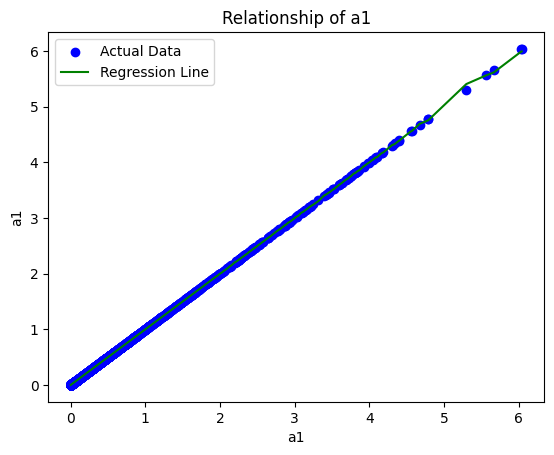

a2 - MAE: 0.0004, RMSE: 0.0050, R²: 1.0000


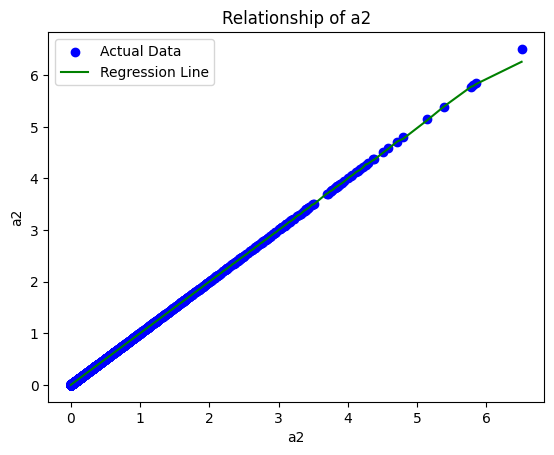

a3 - MAE: 0.0004, RMSE: 0.0045, R²: 1.0000


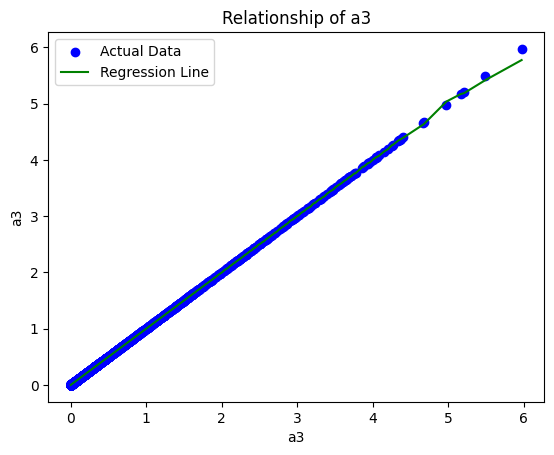

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Function to load data
def load_data(file_path):
    data = pd.read_excel(file_path)
    return data

# Function to add anomaly detection columns based on the provided rules
def add_anomaly_columns(data):
    data['Anomaly'] = (
        ((data['a1'] == 0) & ((data['a2'] > 0) | (data['a3'] > 0))) |
        ((data['a2'] == 0) & ((data['a1'] > 0) | (data['a3'] > 0))) |
        ((data['a3'] == 0) & ((data['a1'] > 0) | (data['a2'] > 0)))
    )
    return data

# Function to add feature engineering columns
def add_features(data):
    data['mean_a'] = data[['a1', 'a2', 'a3']].mean(axis=1)
    data['std_a'] = data[['a1', 'a2', 'a3']].std(axis=1)
    return data

# Function to prepare data for classification
def prepare_classification_data(data):
    features = ['a1', 'a2', 'a3', 'mean_a', 'std_a']
    X = data[features]
    y = data['Anomaly']
    return X, y

# Function to calculate regression metrics and return the model
def calculate_regression_metrics(data, a_col):
    valid_mask = (data[a_col] != 0)
    X = data[valid_mask][[a_col]].values
    y = data[valid_mask][a_col].values

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    return mae, rmse, r2, model

# Upload file from Colab
from google.colab import files
uploaded = files.upload()

# Load the file
file_path = list(uploaded.keys())[0]
data = load_data(file_path)
data = add_anomaly_columns(data)
data = add_features(data)
X, y = prepare_classification_data(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy and classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')
print(report_rf)

# Save the anomalies to a new Excel file
anomalies = data[data['Anomaly'] == True]
anomalies_file_path = 'anomalies.xlsx'
anomalies.to_excel(anomalies_file_path, index=False)
print(f'Anomalies have been saved to {anomalies_file_path}')

# Plot regression results
for a_col in ['a1', 'a2', 'a3']:
    mae, rmse, r2, model = calculate_regression_metrics(data, a_col)
    print(f'{a_col} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}')

    plt.figure()
    valid_mask = (data[a_col] != 0)
    X = data[valid_mask][[a_col]].values
    y = data[valid_mask][a_col].values
    y_pred = model.predict(X)

    plt.scatter(X, y, label='Actual Data', color='blue')
    sorted_idx = X.flatten().argsort()
    plt.plot(X[sorted_idx], y_pred[sorted_idx], color='green', label='Regression Line')
    plt.xlabel(a_col)
    plt.ylabel(a_col)
    plt.title(f'Relationship of {a_col}')
    plt.legend()

    plt.show()


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Functions defined as before
def load_data(file):
    data = pd.read_excel(file.name)
    return data

def add_anomaly_columns(data):
    data['Anomaly'] = (
        ((data['a1'] == 0) & ((data['a2'] > 0) | (data['a3'] > 0))) |
        ((data['a2'] == 0) & ((data['a1'] > 0) | (data['a3'] > 0))) |
        ((data['a3'] == 0) & ((data['a1'] > 0) | (data['a2'] > 0)))
    )
    return data

def add_features(data):
    data['mean_a'] = data[['a1', 'a2', 'a3']].mean(axis=1)
    data['std_a'] = data[['a1', 'a2', 'a3']].std(axis=1)
    return data

def prepare_classification_data(data):
    features = ['a1', 'a2', 'a3', 'mean_a', 'std_a']
    X = data[features]
    y = data['Anomaly']
    return X, y

def calculate_regression_metrics(data, a_col):
    valid_mask = (data[a_col] != 0)
    X = data[valid_mask][[a_col]].values
    y = data[valid_mask][a_col].values

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    return mae, rmse, r2, model

def process_data(file):
    data = load_data(file)
    data = add_anomaly_columns(data)
    data = add_features(data)
    X, y = prepare_classification_data(data)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

    anomalies = data[data['Anomaly'] == True]
    anomalies_file_path = '/content/anomalies.xlsx'
    anomalies.to_excel(anomalies_file_path, index=False)

    # Generate a plot
    fig, ax = plt.subplots()
    for a_col in ['a1', 'a2', 'a3']:
        mae, rmse, r2, model = calculate_regression_metrics(data, a_col)
        valid_mask = (data[a_col] != 0)
        X = data[valid_mask][[a_col]].values
        y = data[valid_mask][a_col].values
        y_pred = model.predict(X)

        ax.scatter(X, y, label=f'Actual Data ({a_col})')
        sorted_idx = X.flatten().argsort()
        ax.plot(X[sorted_idx], y_pred[sorted_idx], label=f'Regression Line ({a_col})')

    ax.set_xlabel('Amperes')
    ax.set_ylabel('Values')
    ax.set_title('Regression Analysis')
    ax.legend()
    plt.tight_layout()
    plt.savefig('/content/plot.png')

    return accuracy_rf, report_rf, anomalies_file_path, '/content/plot.png'

interface = gr.Interface(
    fn=process_data,
    inputs=gr.File(label="Upload your Excel file"),
    outputs=[gr.Textbox(label="Accuracy"), gr.JSON(label="Classification Report"), gr.File(label="Download Anomalies"), gr.Image(label="Regression Plot")],
    live=True
)

interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f9659015a124c9abd0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
pip freeze > requirements.txt
